<a href="https://colab.research.google.com/github/saragamilmohamed/Vegetables-Classification/blob/main/Vegetables%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'vegetable-image-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1817999%2F2965251%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240830%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240830T125329Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1ccffa1202ef9c592cfeb757c4f70e7c801f75919f809b6ae300d29609af74fbd7eaa52603743379030ef7a098d32c7de5cef973bef177c9fa674522518e477959bdd150eeeb6361d13edf90651c50c0fc789cc7bccacdcdf20b9e19865c4d720df2c1d278f8501a61bb96cdd0b7d346c2313e04f70d23ec76fa396b9e1e2dac8be877c1b262f429a17a21a73644a0207c55f7af110b565132a86d70d778da8eac6fcb46e5cadf5859449f0edea6d1e4c6a34403ccc9ea2db44e53ce53c211384fe2b0fa01e6a9dec951b2e17074acf8e5fd0de38170dc5768c7e88d3d2372b3412e09c3aea281aa994d4c540c008cef57ce63ea5a651cb734d8db820aab7026,capsicums:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2741401%2F4737304%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240830%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240830T125329Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db9f383a7f278ab490e28cebf43f8a6294212a904ec06d548a4de792e4d9e6adc19743ea61c0c3544e448f51ad19d8a6377b64fd37032d96e161c5c079f7cef857fe173624368508b5a73095d0b6da31ec121bcd712c764882b610f3a9b06d25c916ca5f2af73da3bd930472bddaf11ef0e3ac34588c01ef568701f8fb335174393adace0afcc91a1e0c474876f53287d1b8092d2ca297607a3f5ae8da7dacabb1231d052ffb8a3f9aa19fc4f96bb9bd87e217265afd11d6ae2e3c63ce5390722f9f727cb5a65ab6e0c9f41a39e3808fef6797fba0d8c81fa1e511869755f33a02aced3d107cfb96f3c35535f87caef20838fbcee288df28ce0eaeb4a7e1899a2'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


**Libraries**

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import glob as gb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras .layers import Dense,Activation,MaxPooling2D,Conv2D,Flatten,Dropout

**Train Data**

In [ ]:
trainPath=r"/kaggle/input/vegetable-image-dataset/Vegetable Images/train"

In [ ]:
for folder in  os.listdir(trainPath ) :
    files = gb.glob(pathname= str( trainPath +'/' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 1000 in folder Broccoli
For training data , found 1000 in folder Capsicum
For training data , found 1000 in folder Bottle_Gourd
For training data , found 1000 in folder Radish
For training data , found 1000 in folder Tomato
For training data , found 1000 in folder Brinjal
For training data , found 1000 in folder Pumpkin
For training data , found 1000 in folder Carrot
For training data , found 1000 in folder Papaya
For training data , found 1000 in folder Cabbage
For training data , found 1000 in folder Bitter_Gourd
For training data , found 1000 in folder Cauliflower
For training data , found 1000 in folder Bean
For training data , found 1000 in folder Cucumber
For training data , found 1000 in folder Potato


In [ ]:
size=[]
for folder in  os.listdir(trainPath ) :
    files = gb.glob(pathname= str( trainPath +'/' + folder + '/*.jpg'))
    for file in files:
        img=cv2.imread(file)
        size.append(img.shape)
pd.Series(size).value_counts()

(224, 224, 3)    14994
(210, 224, 3)        1
(211, 224, 3)        1
(198, 224, 3)        1
(193, 224, 3)        1
(200, 224, 3)        1
(205, 224, 3)        1
dtype: int64

In [ ]:
code={}
for num , folder in enumerate(os.listdir(trainPath)):
    code.update({folder:num})

def getcode(n) :
    for x , y in code.items() :
        if n == y :
            return x

print(code)

{'Broccoli': 0, 'Capsicum': 1, 'Bottle_Gourd': 2, 'Radish': 3, 'Tomato': 4, 'Brinjal': 5, 'Pumpkin': 6, 'Carrot': 7, 'Papaya': 8, 'Cabbage': 9, 'Bitter_Gourd': 10, 'Cauliflower': 11, 'Bean': 12, 'Cucumber': 13, 'Potato': 14}


In [ ]:
s=100
X_train = []
y_train = []
for folder in  os.listdir(trainPath ) :
    files = gb.glob(pathname= str( trainPath +'/' + folder + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])


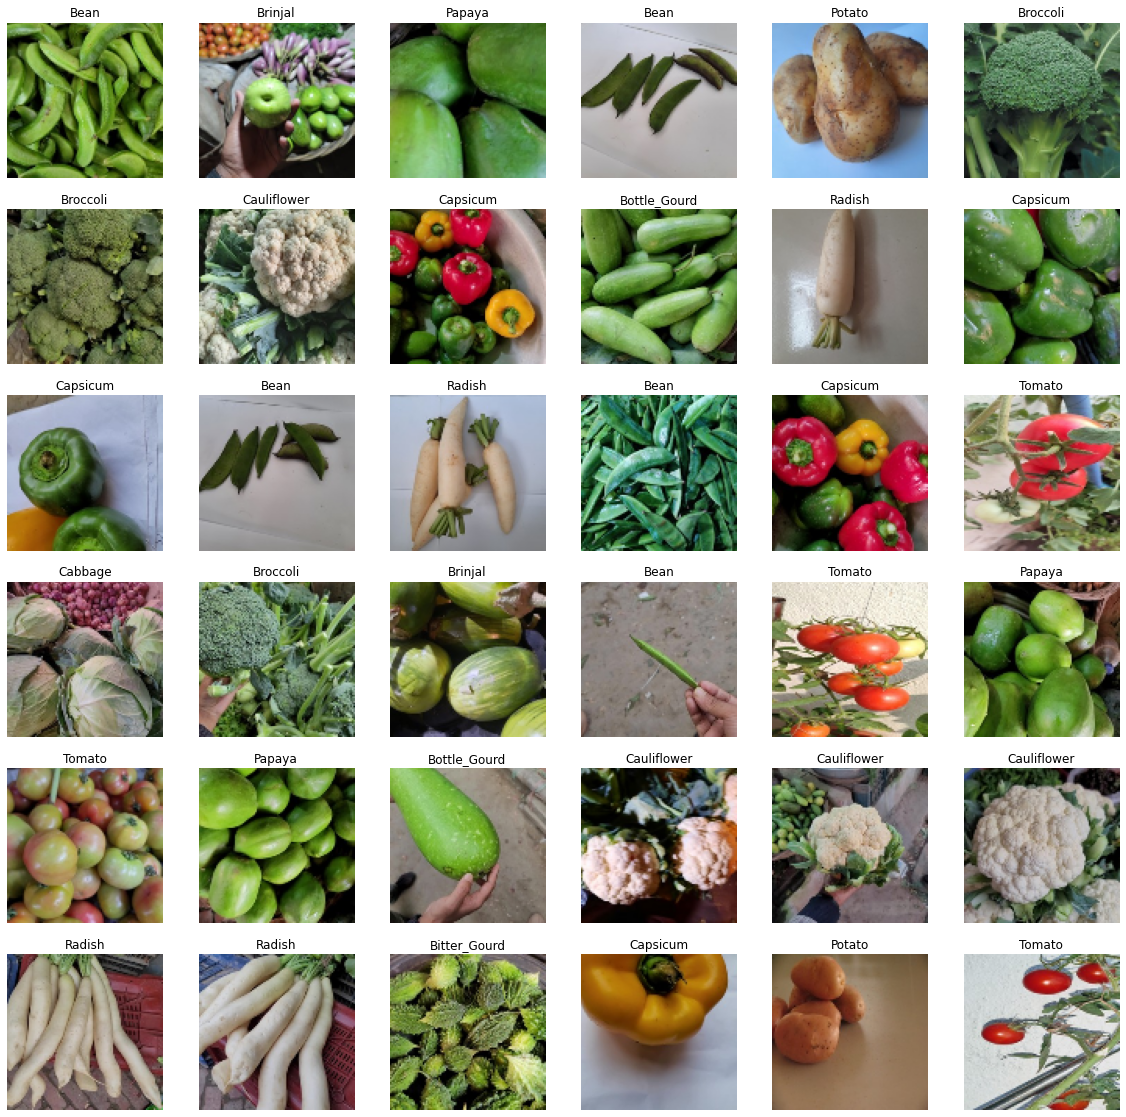

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

**Test Data**

In [ ]:
testPath=r"/kaggle/input/vegetable-image-dataset/Vegetable Images/test"

In [ ]:
for folder in  os.listdir(testPath ) :
    files = gb.glob(pathname= str( testPath +'/' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 200 in folder Broccoli
For training data , found 200 in folder Capsicum
For training data , found 200 in folder Bottle_Gourd
For training data , found 200 in folder Radish
For training data , found 200 in folder Tomato
For training data , found 200 in folder Brinjal
For training data , found 200 in folder Pumpkin
For training data , found 200 in folder Carrot
For training data , found 200 in folder Papaya
For training data , found 200 in folder Cabbage
For training data , found 200 in folder Bitter_Gourd
For training data , found 200 in folder Cauliflower
For training data , found 200 in folder Bean
For training data , found 200 in folder Cucumber
For training data , found 200 in folder Potato


In [ ]:
size=[]
for folder in  os.listdir(testPath ) :
    files = gb.glob(pathname= str( testPath +'/' + folder + '/*.jpg'))
    for file in files:
        img=cv2.imread(file)
        size.append(img.shape)
pd.Series(size).value_counts()

(224, 224, 3)    2999
(207, 224, 3)       1
dtype: int64

In [ ]:
code={}
for num , folder in enumerate(os.listdir(testPath)):
    code.update({folder:num})

def getcode(n) :
    for x , y in code.items():
        if n == y :
            return x

print(code)

{'Broccoli': 0, 'Capsicum': 1, 'Bottle_Gourd': 2, 'Radish': 3, 'Tomato': 4, 'Brinjal': 5, 'Pumpkin': 6, 'Carrot': 7, 'Papaya': 8, 'Cabbage': 9, 'Bitter_Gourd': 10, 'Cauliflower': 11, 'Bean': 12, 'Cucumber': 13, 'Potato': 14}


In [ ]:
X_test = []
y_test = []
for folder in  os.listdir(testPath ) :
    files = gb.glob(pathname= str( testPath +'/' + folder + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

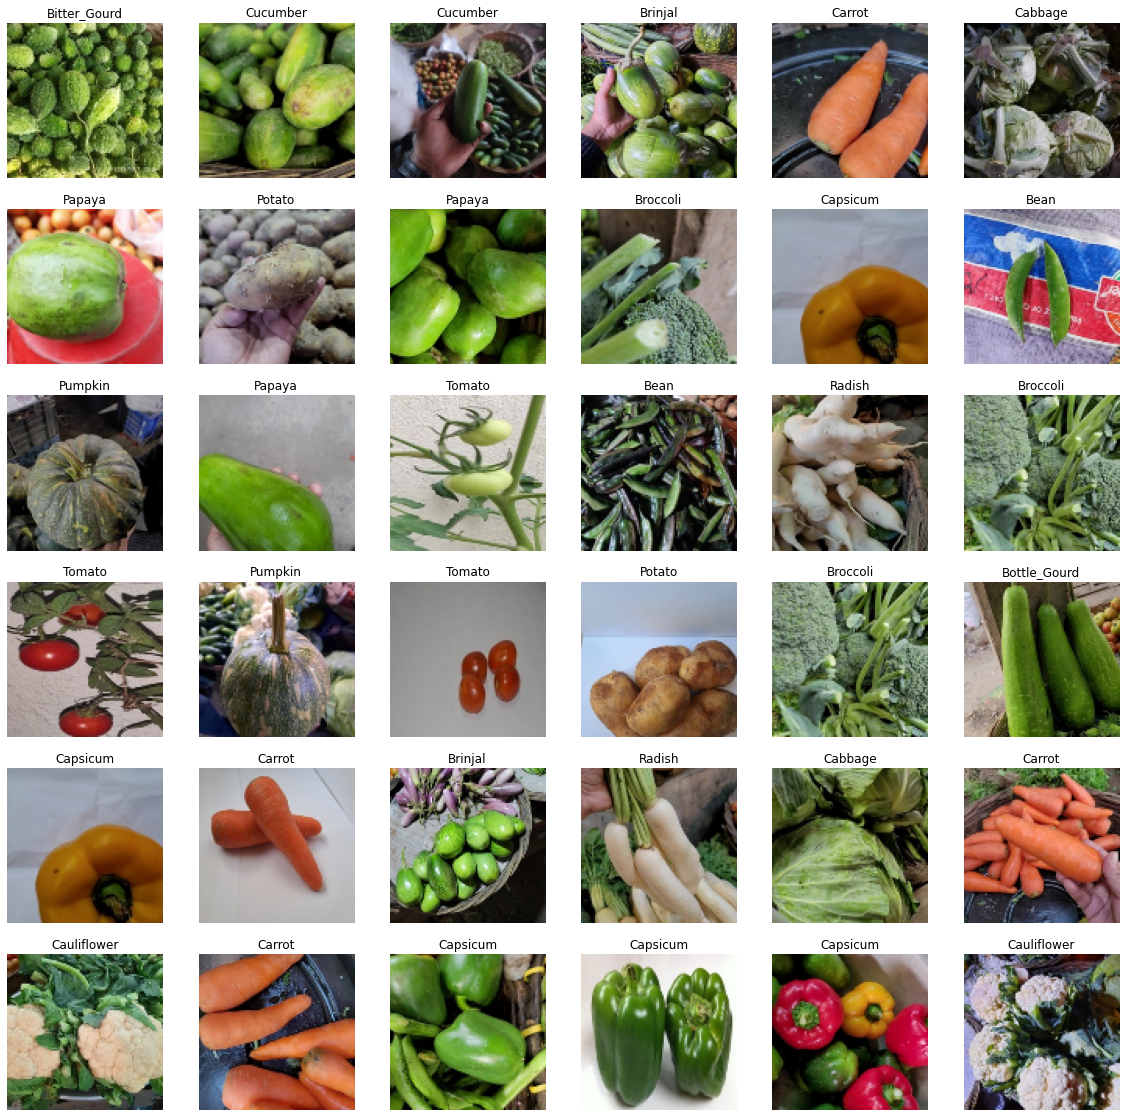

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(getcode(y_test[i]))

**Valid Data**

In [ ]:
validPath=r"/kaggle/input/vegetable-image-dataset/Vegetable Images/validation"

In [ ]:
for folder in  os.listdir(validPath ) :
    files = gb.glob(pathname= str( validPath +'/' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 200 in folder Broccoli
For training data , found 200 in folder Capsicum
For training data , found 200 in folder Bottle_Gourd
For training data , found 200 in folder Radish
For training data , found 200 in folder Tomato
For training data , found 200 in folder Brinjal
For training data , found 200 in folder Pumpkin
For training data , found 200 in folder Carrot
For training data , found 200 in folder Papaya
For training data , found 200 in folder Cabbage
For training data , found 200 in folder Bitter_Gourd
For training data , found 200 in folder Cauliflower
For training data , found 200 in folder Bean
For training data , found 200 in folder Cucumber
For training data , found 200 in folder Potato


In [ ]:

size=[]
for folder in  os.listdir(validPath ) :
    files = gb.glob(pathname= str( validPath +'/' + folder + '/*.jpg'))
    for file in files:
        img=cv2.imread(file)
        size.append(img.shape)
pd.Series(size).value_counts()

(224, 224, 3)    2998
(187, 224, 3)       1
(223, 224, 3)       1
dtype: int64

In [ ]:
code={}
for num , folder in enumerate(os.listdir(validPath)):
    code.update({folder:num})

def getcode(n) :
    for x , y in code.items() :
        if n == y :
            return x

print(code)

{'Broccoli': 0, 'Capsicum': 1, 'Bottle_Gourd': 2, 'Radish': 3, 'Tomato': 4, 'Brinjal': 5, 'Pumpkin': 6, 'Carrot': 7, 'Papaya': 8, 'Cabbage': 9, 'Bitter_Gourd': 10, 'Cauliflower': 11, 'Bean': 12, 'Cucumber': 13, 'Potato': 14}


In [ ]:
X_valid = []
y_valid = []
for folder in  os.listdir(validPath) :
    files = gb.glob(pathname= str( validPath +'/' + folder + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
        image_array = cv2.resize(image , (s,s))
        X_valid.append(list(image_array))
        y_valid.append(code[folder])

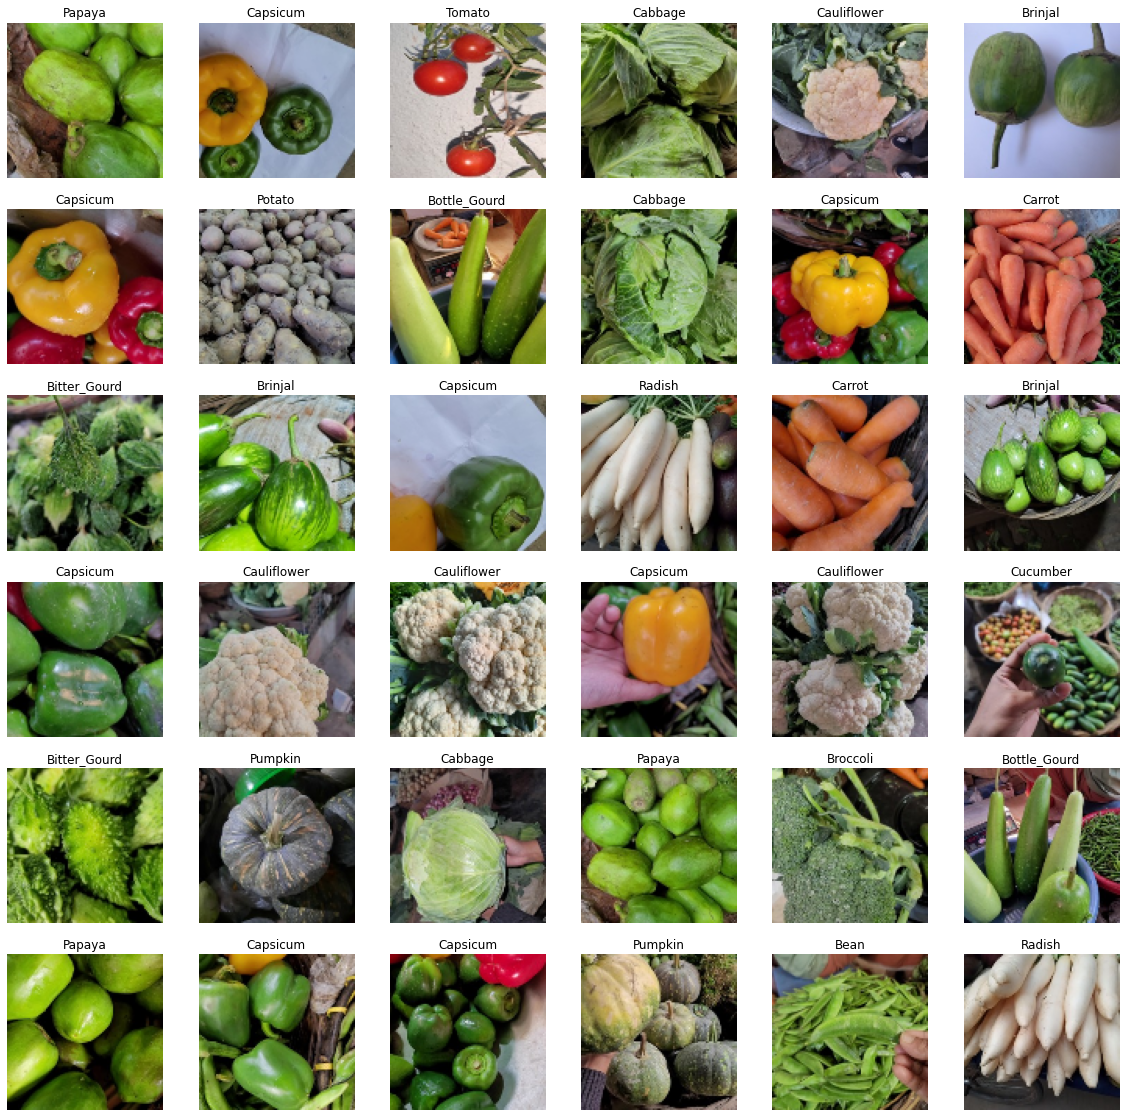

In [ ]:

plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_valid),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_valid[i])
    plt.axis('off')
    plt.title(getcode(y_valid[i]))

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_valid=np.array(X_valid)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_valid=np.array(y_valid)
print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_valid shape  is {X_valid.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')
print(f'y_valid shape is {y_valid.shape}')

X_train shape  is (15000, 100, 100, 3)
X_test shape  is (3000, 100, 100, 3)
X_valid shape  is (3000, 100, 100, 3)
y_train shape  is (15000,)
y_test shape  is (3000,)
y_valid shape is (3000,)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=X_train.shape[1:]))
model.add(MaxPooling2D())

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())

model.add(Dense(128,activation ="relu"))
model.add(Dense(64,activation ="relu"))
model.add(Dense(15, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 512)         5

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:

from keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=2,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
earlystop = EarlyStopping(patience=5)

In [ ]:
history = model.fit(X_train,y_train, batch_size=64,
                              epochs = 20, validation_data = (X_valid,y_valid),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 64
                              , callbacks=[earlystop,learning_rate_reduction])

In [ ]:
val_Loss, val_Accuracy = model.evaluate(X_test, y_test)

print('Test Loss is '+str(val_Loss))
print('Test Accuracy is '+str(val_Accuracy ))

In [ ]:
y_pred =model.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(getcode(np.argmax(y_pred[i])))

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train','valid'],loc='lower right')
plt.tight_layout()

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 20, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 20, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()


In [ ]:
img=cv2.imread(r'/kaggle/input/capsicums/FreshGreenRedYellowOrangeBellCapsicum.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB )
img_arr=cv2.resize(img , (100,100))
img_arr=np.array(img_arr)
plt.imshow(img_arr)
img_arr = np.expand_dims(img_arr,axis=0)
print(img_arr.shape)
y_pred=model.predict(img_arr)


plt.title(getcode(np.argmax(y_pred)))